In [1]:
import numpy as np
import random
import sympy as sp
import numpy.linalg as la

import control as con
import optim_tools as optim_tools#own file with helper


%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
A = np.matrix([[ 0., 0.,  0.,   -1.       ],
               [ 0., 0.,  0,    22.7272727],
               [ 0., 10,  0,    24.4318182],
               [ 0., 0, -100, -86.3636364]])

B = np.matrix([[0],
               [22.72727273],
               [-6.25      ],
               [ 0.        ]])

C = np.matrix([[ 1.,  0., 0., 0.],
               [ 0., 0.,  0., -1.]])

C1 = np.matrix([[ 1.,  0., 0., 0.]])

D1 = np.matrix([[ 0. ]])
D = np.matrix([[ 0. ], [ 0. ]])


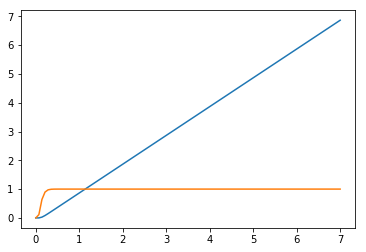

A = [[-8.63636364e+01 -2.44318182e+03 -2.27272727e+04 -0.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]]

B = [[1.]
 [0.]
 [0.]
 [0.]]

C = [[-1.15504493e-16 -4.92819169e-15 -6.25000000e+02  2.27272727e+04]]

D = [[0.]]



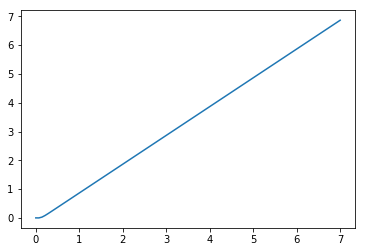

In [7]:
T2, yout2 = con.step_response(con.ss(A, B, C, D))
#T2, yout2 = con.matlab.step(con.ss(A, B, C, D))
[plt.plot(T2, y) for y in yout2]
plt.show()

ss, T2 = con.canonical_form(con.ss(A, B, C0, D0), form='reachable')
print ss

A0 = optim_tools.reverse_x_order(np.matrix(ss.A))
a0 = -A[-1][:].T #!!!!

b0 = optim_tools.reverse_x_order(np.matrix(ss.B))
c0 = optim_tools.reverse_x_order(np.matrix(ss.C))
d0 = optim_tools.reverse_x_order(np.matrix(ss.D)) # == 0!

T3, yout3 = con.step_response(con.ss(A0, b0, c0, d0))
plt.plot(T3, yout3)
plt.show()

In [25]:
k = con.place(A0,b0,[-10, -2, -2, -4])


In [29]:
T = np.arange(0, 5, 1e-2) 

#s: input, e.g., step function with amplitude of 0.2
s = np.zeros(len(T));
s = np.ones(len(T))*1./1400;


# Initial state
x0 = np.matrix([[0.0],[0.0],[0.0],[0.0]])

In [30]:
y, u, u_sat = optim_tools.simulate(A0, b0, c0, d0, lambda y, s, x: s-k.dot(x), s, T, umax=None, x0=x0)


Populating the interactive namespace from numpy and matplotlib


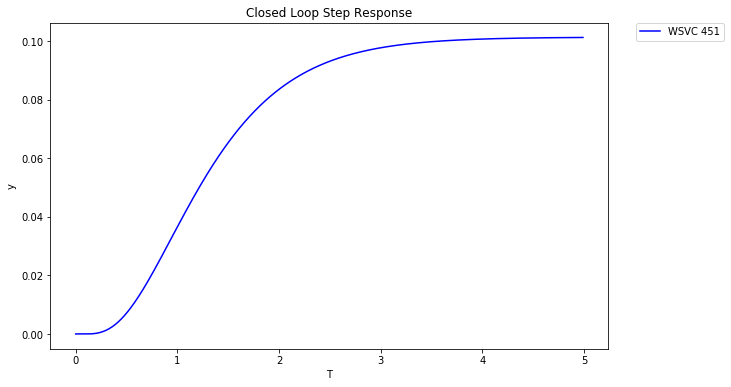

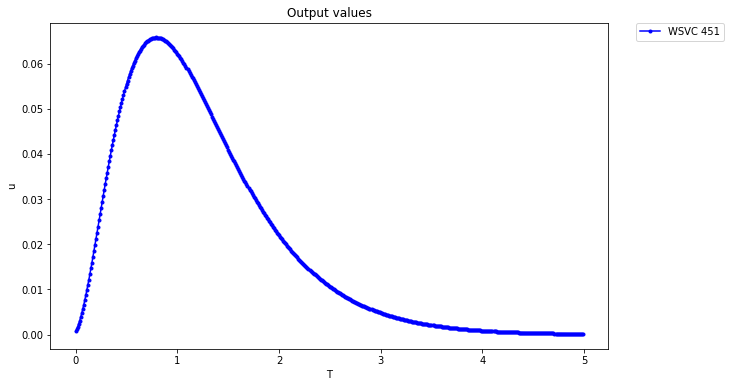

In [31]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
import matplotlib.pyplot as plt

#plt.figure()
line0, = plt.plot(T[:], np.array(y[0,:].T), 'b', label='WSVC 451')

#first_legend = plt.legend(handles=[line1], loc=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('T')
plt.ylabel('y')
plt.title('Closed Loop Step Response')
plt.show()


line0, = plt.plot(T, u, 'b.-', label='WSVC 451')

#>first_legend = plt.legend(handles=[line1, line2, line1b, line2b], loc=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('T')
plt.ylabel('u')
plt.title('Output values')
plt.show()



In [37]:
xxx = range(0,10)
print xxx
xxx[-1*10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


0

In [76]:
import collections
delay = 5
joint_vel_buffer = collections.deque(maxlen=delay+1)

i = 0

In [103]:
joint_vel_buffer.append(i)
i = i + 1
print joint_vel_buffer
print joint_vel_buffer[0]

deque([21, 22, 23, 24, 25, 26], maxlen=6)
21
